In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
from datetime import datetime

In [7]:
df_info = pd.read_csv('clean_data.csv')
df_info

,Id,Title,Price(Triệu/tháng),Square(m²),District,City,Date
0,329,Tìm người ở ghép phòng trọ gần ngã 3 Lũy Bán B...,8.4,NaN,Tân Phú,Hồ Chí Minh,17/05/2018
1,1110,"Cho thuê phòng trọ 25m2, giờ tự do hẻm 137 Trị...",2.5,25.0,Tân Phú,Hồ Chí Minh,14/05/2018
2,1114,Chuyên cho thuê CH Era Town có thể dọn vào ở l...,2.0,15.0,Quận 7,Hồ Chí Minh,14/05/2018
3,1275,"Phòng gác lửng, máy lạnh, ban công, WC riêng, ...",3.7,NaN,Quận 7,Hồ Chí Minh,14/05/2018
4,1592,Cho thuê phòng full nội thất cho nữ trong căn ...,3.8,NaN,Nhà Bè,Hồ Chí Minh,14/05/2018


In [25]:
df_info["Date"] = df_info["Date"].str.replace('\n','')
df_info["Date"] = pd.to_datetime(df_info["Date"],format = "%d/%m/%Y ",errors = 'coerce')

Ta nhận thấy rằng các cột có thể tính toán sự phân bố đó là Price(Triệu/tháng), Square(m²), Date, và District. 2 cột Price và Square đã ở dạng số nên có thể tính trực tiếp, còn cột Date phải xử lý.

Với cột Date, ta sẽ không tính trực tiếp mà ta sẽ chuyển nó thành 1 thuộc tính đó là số ngày đăng

In [26]:
#Lấy ngày hôm nay
today = date.today()
today_column = pd.Series(np.full(len(df_info.index),fill_value = today))
today_column = today_column.astype('datetime64[ns]')
df_info["Num_day"] = (today_column - df_info["Date"]).dt.days
df_info.drop(df_info[df_info["Num_day"] < 0].index,inplace = True)


Ta sẽ tính các giá trị:

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

In [28]:
pd.set_option('display.max_columns', None)

num_col_info_df = pd.DataFrame([],index= ["missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max" ])
col = ['Price(Triệu/tháng)','Square(m²)','Num_day']

for i in col:
    missing = np.array(df_info[i].isna().sum()*100/len(df_info)) #tinh phan tram gia tri thieu
    distribu = np.nanpercentile(df_info[i],(0,25,50,75,100)) #tinh min,lower,median,upper,max
    data = np.append(missing,distribu)
    num_col_info_df[i] = data.round(1)
num_col_info_df

,Price(Triệu/tháng),Square(m²),Num_day
missing_ratio,3.3,12.4,0.5
min,0.0,1.0,1.0
lower_quartile,2.4,20.0,1345.0
median,3.5,25.0,1540.0
upper_quartile,5.0,30.0,1598.0
max,3000000.0,350.0,1665.0


Với các cột không phải dạng số: Title, District, City, ta sẽ tính:

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu
- Số lượng giá trị khác nhau
- Giá trị xuất hiện nhiều nhất
- Giá trị xuẩt hiện ít nhất

In [29]:
col = ['Title','District','City']
ob_col_info_df = pd.DataFrame([],index = ['missing ratio','num diff value','Most appear','Min appear'])

for i in col:
    missing = np.array(df_info[i].isna().sum()*100/len(df_info)) #tinh phan tram gia tri thieu
    diff_value = len(df_info[i].dropna().unique())
    count_value = df_info[i].dropna().value_counts()
    most_ap = count_value[0]
    least_ap = count_value[-1]
    ob_col_info_df[i] = [missing,diff_value,most_ap,least_ap]
ob_col_info_df

,Title,District,City
missing ratio,0.0,0.0,0.0
num diff value,3414,23,1
Most appear,1,618,3414
Min appear,1,4,3414


Ta sẽ vẽ một vài biểu đồ để xem xét rõ hơn sự phân bố

In [31]:
#Hàm vẽ
def draw_chart(df_col,til,x_name,y_name,typechart = 0):
    #Tính tần số và sắp xếp giảm dần
    data_num = df_col.value_counts()

    #Kiểm tra xem có phải là dạng barh không
    if typechart==1:
        plt.barh(data_num.index,data_num.values,height= 0.5)
    else:
        plt.bar(data_num.index,data_num.values)
        
    plt.title(til)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()

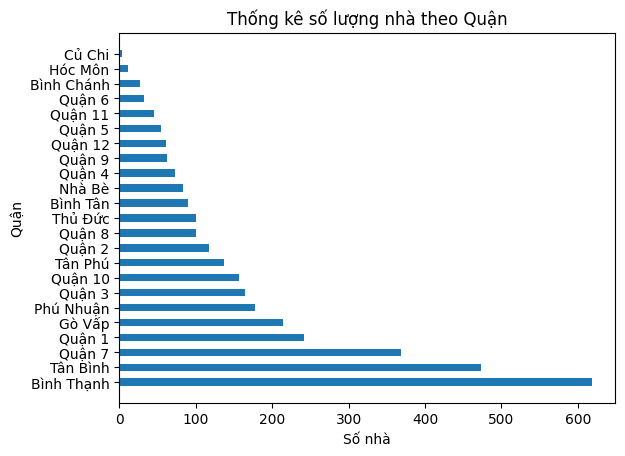

In [32]:
draw_chart(df_info["District"],"Thống kê số lượng nhà theo Quận","Số nhà","Quận",1)

Giá trị nhà ảo là những giá trị thuê lớn hơn 100, ta sẽ bỏ đi những dòng này để tránh gây ảnh hưởng đến dữ liệu

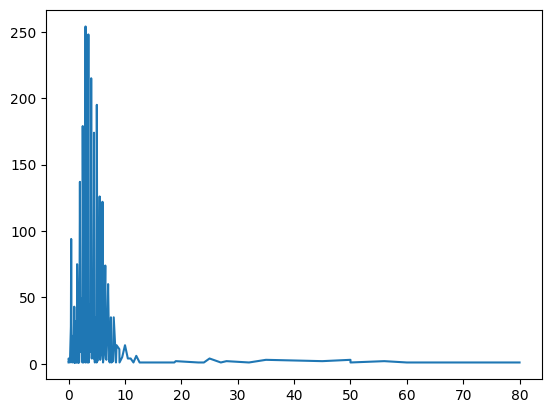

In [34]:
#Chia thành từng khoảng 1 triệu

df_info.drop(df_info[df_info["Price(Triệu/tháng)"]>100].index,inplace=True)
count_price = df_info["Price(Triệu/tháng)"].value_counts()
count_price = count_price.sort_index()
plt.plot(count_price.index,count_price.values)
plt.show()

Ta thấy dữ liệu tập trung chủ yếu từ 0 đến 10 triệu, vậy ta sẽ lấy dữ liệu khoảng này để vẽ rõ hơn ( vẽ bằng bar chart )

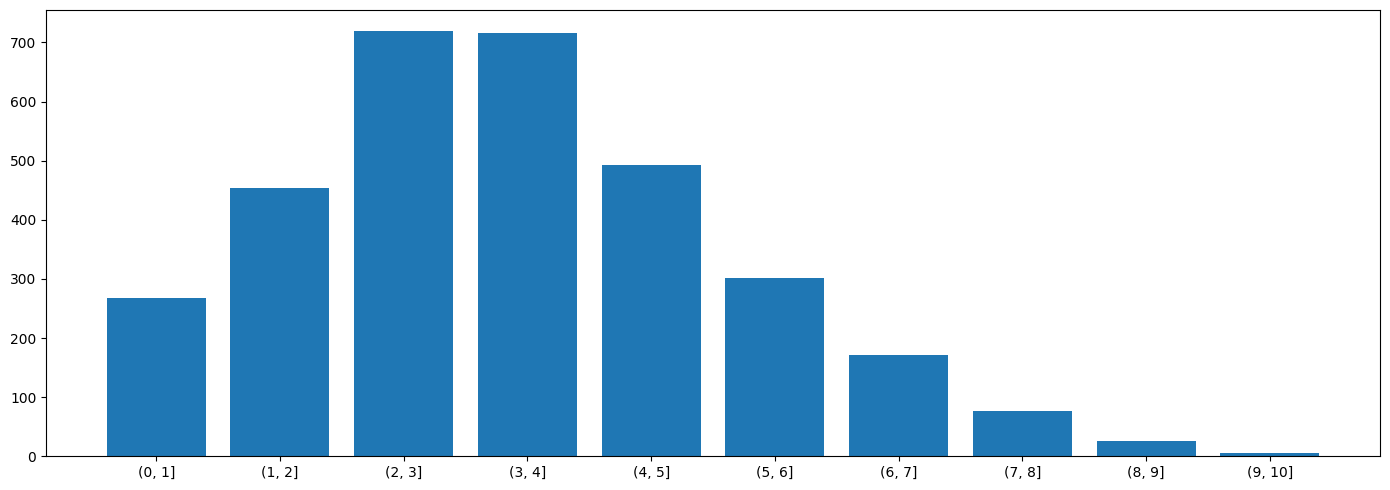

In [37]:
price_10 = df_info[df_info["Price(Triệu/tháng)"]<10]["Price(Triệu/tháng)"]
price_list_range = np.arange(0,11,1)

range_price_10 = pd.cut(price_10,bins = price_list_range)

count_price_10 = range_price_10.value_counts().sort_index()
count_price_10 = count_price_10.reset_index()
count_price_10.columns = ["Range","So luong"]
count_price_10["Range"] = count_price_10["Range"].astype(str)

plt.subplots(figsize = (14,5))
plt.bar(count_price_10["Range"],count_price_10["So luong"])
plt.tight_layout()
plt.show()


Ta cũng vẽ đồ thị biểu diễn số lượng nhà theo diện tích

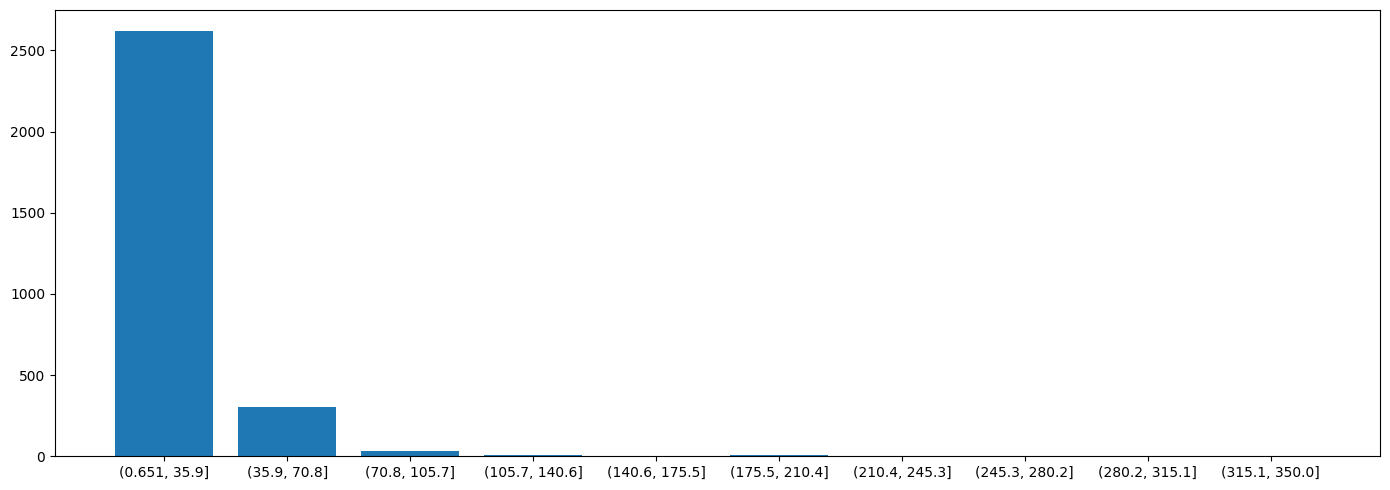

In [39]:
a = df_info["Square(m²)"].dropna()
b = pd.cut(a.values,bins=10)

c = b.value_counts().sort_index()
c = c.reset_index()
c.columns = ["Range","So luong"]
c["Range"] = c["Range"].astype(str)
plt.subplots(figsize = (14,5))
plt.bar(c["Range"],c["So luong"])
plt.tight_layout()
plt.show()

Dữ liệu tập trung nhiều ở khoảng dưới 70, vậy ta sẽ dùng dữ liệu khoảng này để vẽ lại rõ hơn

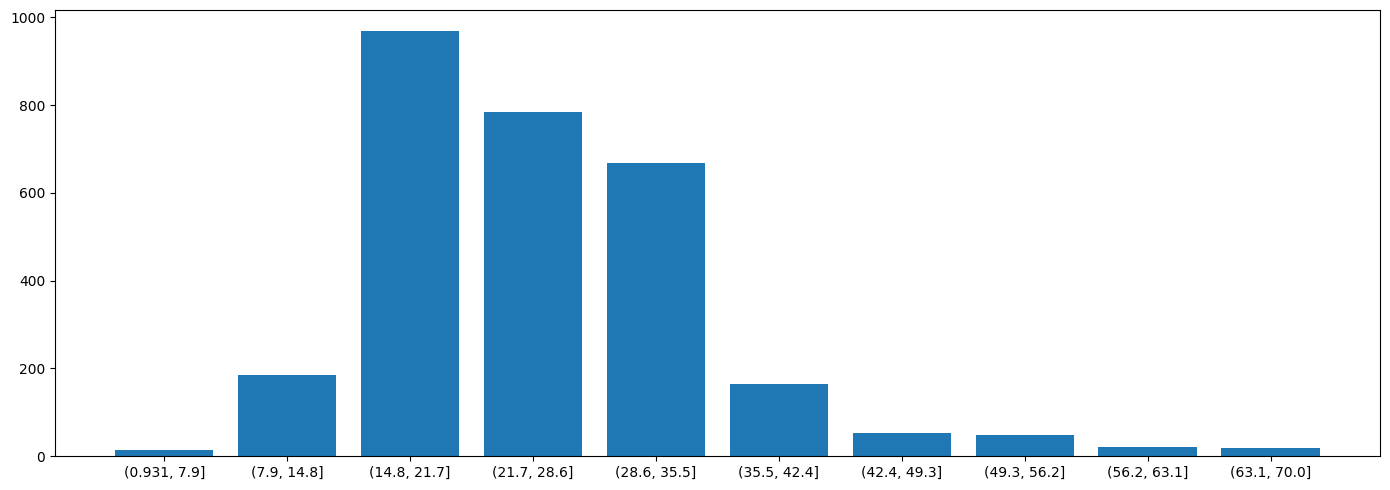

In [41]:
square150 =  df_info[df_info["Square(m²)"] <= 70]["Square(m²)"]
range_square150 = pd.cut(square150,bins = 10)

count_square150 = range_square150.value_counts().sort_index()
count_square150 = count_square150.reset_index()
count_square150.columns = ["Range","So luong"]
count_square150["Range"] = count_square150["Range"].astype(str)
plt.subplots(figsize = (14,5))
plt.bar(count_square150["Range"],count_square150["So luong"])
plt.tight_layout()
plt.show()

Ta thường có quan niệm rằng diện tích càng lớn thì giá nhà càng cao, vậy ta thử vẽ đồ thị scatterplot để xem mối liên hệ này có đúng không

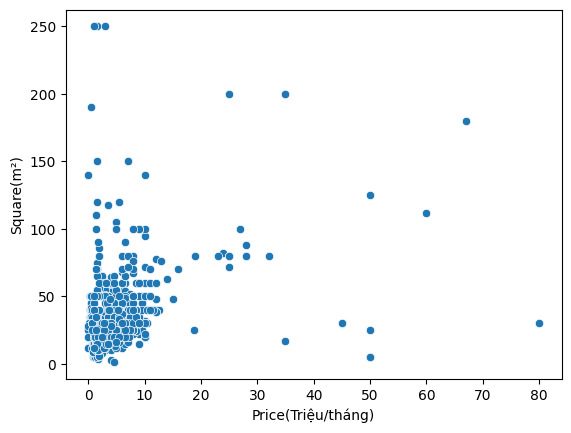

In [43]:
df_data = df_info[["Price(Triệu/tháng)","Square(m²)"]]
sns.scatterplot(df_data,x = df_data["Price(Triệu/tháng)"],y = df_data["Square(m²)"])
plt.show()

Điểm dữ liệu tập trung nhiều ở Square dưới 100 và Price dưới 10, ta sẽ lấy dữ liệu ở những khoảng này để vẽ rõ hơn

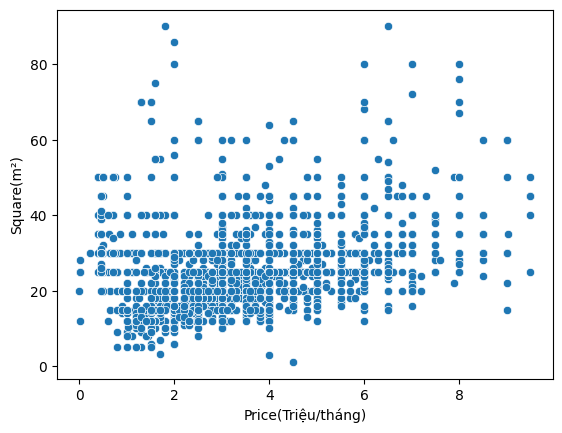

In [44]:
df_data = df_info[["Price(Triệu/tháng)","Square(m²)"]]
df_price_square = df_data[df_data["Price(Triệu/tháng)"] < 10]
df_price_square = df_price_square[df_price_square["Square(m²)"] < 100]
sns.scatterplot(df_price_square,x = df_price_square["Price(Triệu/tháng)"],y = df_price_square["Square(m²)"])
plt.show()

Quan sát đồ thị trên, ta thấy có vẻ rằng mối liên hệ này không hẳn đúng (trong tập dữ liệu này) khi không có thể đường tuyến tính nào cả. Vậy chắc hẳn ngoài diện tích thì còn nhiều yếu tố khác tác động lên giá nhà